# Goodwin's oscillator toy model

This example shows how the Goodwin's Oscillator toy model can be used.

This model has five parameters, and three oscillating states.

In [1]:
import pints
import pints.toy
import pints.plot
import matplotlib.pyplot as plt
import numpy as np

model = pints.toy.GoodwinOscillatorModel()

We can get an example set of parameters using the `suggested_parameters()` method:

In [38]:
real_parameters = model.suggested_parameters()
print(real_parameters)

[ 2.    4.    0.12  0.08  0.1 ]


In the same way, we can get a suggested set of sampling times:

In [3]:
times = model.suggested_times()

Now we can run a simulation:

In [23]:
values = model.simulate(real_parameters, times)

This gives us all we need to create a plot of current versus time:

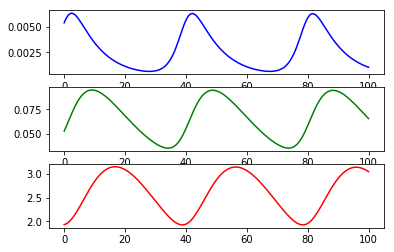

In [33]:
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(times, values[:, 0], 'b')
plt.subplot(3, 1, 2)
plt.plot(times, values[:, 1], 'g')
plt.subplot(3, 1, 3)
plt.plot(times, values[:, 2], 'r')
plt.show()

Now we will add some noise to generate some fake "experimental" data and try to recover the original parameters.

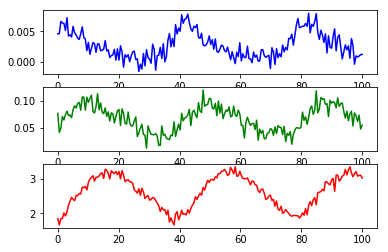

In [34]:
noise1 = 0.001
noise2 = 0.01
noise3 = 0.1
noisy_values = np.array(values, copy=True)
noisy_values[:, 0] += np.random.normal(0, noise1, len(times))
noisy_values[:, 1] += np.random.normal(0, noise2, len(times))
noisy_values[:, 2] += np.random.normal(0, noise3, len(times))

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(times, noisy_values[:, 0], 'b')
plt.subplot(3, 1, 2)
plt.plot(times, noisy_values[:, 1], 'g')
plt.subplot(3, 1, 3)
plt.plot(times, noisy_values[:, 2], 'r')
plt.show()

Now we can try and infer the original parameters:

In [46]:
# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 0.01, 0.01, 0.01], [10, 10, 1, 1, 1])
log_likelihood = pints.KnownNoiseLogLikelihood(problem, [noise1, noise2, noise3])
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
mcmc = pints.MCMCSampling(log_posterior, 3, x0)
mcmc.set_max_iterations(5000)
mcmc.set_log_to_screen(False)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Done!


Now we can inspect the resulting chains:

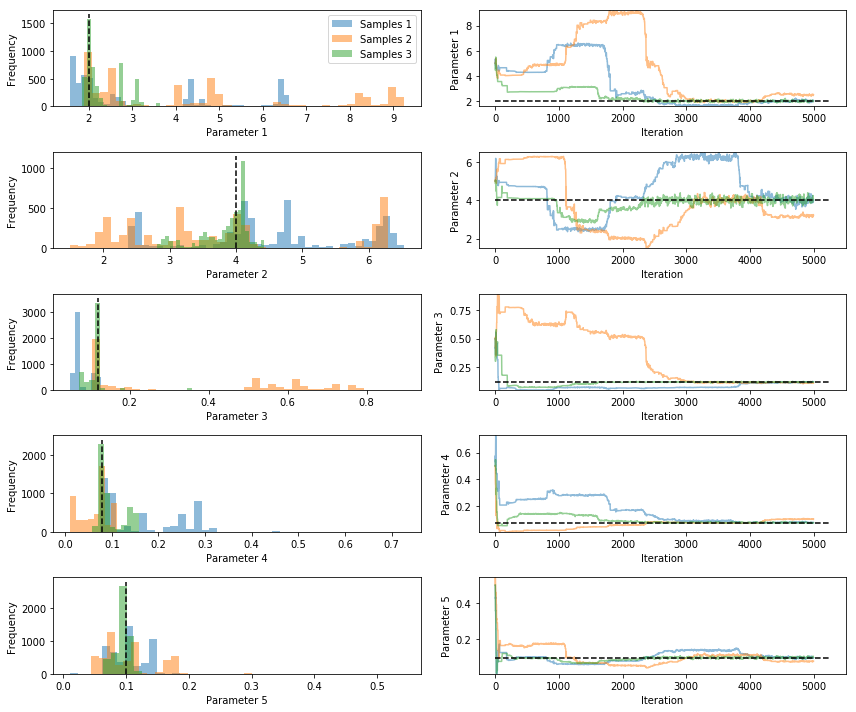

In [47]:
pints.plot.trace(chains, ref_parameters=real_parameters)
plt.show()

This is a pretty hard problem!

And what about optimisation?

In [49]:
# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 0.01, 0.01, 0.01], [10, 10, 1, 1, 1])
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Fit to the noisy data
parameters = []
for x in x0:
    xbest, fbest = pints.optimise(log_posterior, x, method=pints.CMAES)
    parameters.append(xbest)

print('')
print('            p1       p2       p3       p4       p5')
print('real  ' + ' '.join(['{: 8.4g}'.format(float(x)) for x in real_parameters]))
for i, p in enumerate(parameters):
    print('run ' + str(i) + ' ' + ' '.join(['{: 8.4g}'.format(x) for x in p]))
    

Maximising LogPDF
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 8
Iter. Eval. Best      Time m:s
0     8     -4761.135   0:00.2
1     16    -4543.562   0:00.2
2     24    -4543.562   0:00.3
3     32    -3493.119   0:00.3
20    168   -1002.097   0:01.0
40    328   -755.8953   0:01.7
60    488   -749.2533   0:02.3
80    648   -712.2483   0:03.0
100   808    32.23904   0:03.6
120   968    432.6209   0:04.3
140   1128   637.5681   0:05.0
160   1288   818.631    0:05.7
180   1448   824.061    0:06.3
200   1608   825.4715   0:07.0
220   1768   825.54     0:07.7
240   1928   825.6087   0:08.4
260   2088   825.6353   0:09.0
280   2248   825.6537   0:09.7
300   2408   825.6808   0:10.4
320   2568   825.7036   0:11.1
340   2728   825.7265   0:11.7
360   2888   825.742    0:12.4
380   3048   825.7634   0:13.1
400   3208   825.795    0:13.8
420   3368   825.8107   0:14.5
440   3528   825.8211   0:15.2
460   3688   825.8235   0:15.9
480 

WARNING (module=cma.utilities.utils, iteration=615):  flat fitness (sigma=4.03e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=616):  flat fitness (sigma=3.93e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=618):  flat fitness (sigma=3.69e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
620   4968   825.8236   0:21.6
WARNING (module=cma.utilities.utils, iteration=621):  flat fitness (sigma=4.07e-05).
                    For small sigma, this could indicate numerical convergence.
                    O

WARNING (module=cma.utilities.utils, iteration=664):  flat fitness (sigma=3.57e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=665):  flat fitness (sigma=3.63e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=666):  flat fitness (sigma=3.77e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=667):  flat fitness (sigma=3.34e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider h

WARNING (module=cma.utilities.utils, iteration=716):  flat fitness (sigma=4.04e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=718):  flat fitness (sigma=5.34e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=719):  flat fitness (sigma=5.98e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
720   5768   825.8236   0:25.4
WARNING (module=cma.utilities.utils, iteration=721):  flat fitness (sigma=7.69e-05).
                    For small sigma, this could indicate numerical convergence.
                    O

580   4648   825.8236   0:20.2
WARNING (module=cma.utilities.utils, iteration=581):  flat fitness (sigma=3.59e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=582):  flat fitness (sigma=3.22e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=583):  flat fitness (sigma=3.23e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=584):  flat fitness (sigma=3.21e-05).
                    For small sigma, this could indicate numerical convergence.
                    O

WARNING (module=cma.utilities.utils, iteration=623):  flat fitness (sigma=2.92e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=624):  flat fitness (sigma=2.87e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=625):  flat fitness (sigma=2.95e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=626):  flat fitness (sigma=2.89e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider h

WARNING (module=cma.utilities.utils, iteration=659):  flat fitness (sigma=1.83e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=660):  flat fitness (sigma=1.75e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
660   5288   825.8236   0:23.4
WARNING (module=cma.utilities.utils, iteration=661):  flat fitness (sigma=1.69e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=662):  flat fitness (sigma=1.69e-05).
                    For small sigma, this could indicate numerical convergence.
                    O

700   5608   825.8236   0:24.9
WARNING (module=cma.utilities.utils, iteration=701):  flat fitness (sigma=1.06e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=702):  flat fitness (sigma=9.17e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=703):  flat fitness (sigma=9.41e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=704):  flat fitness (sigma=1.16e-04).
                    For small sigma, this could indicate numerical convergence.
                    O

WARNING (module=cma.utilities.utils, iteration=624):  flat fitness (sigma=5.22e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=625):  flat fitness (sigma=5.10e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=626):  flat fitness (sigma=4.30e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=627):  flat fitness (sigma=4.31e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider h

WARNING (module=cma.utilities.utils, iteration=659):  flat fitness (sigma=2.61e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=660):  flat fitness (sigma=2.69e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
660   5288   825.8236   0:23.8
WARNING (module=cma.utilities.utils, iteration=661):  flat fitness (sigma=3.25e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=662):  flat fitness (sigma=3.39e-05).
                    For small sigma, this could indicate numerical convergence.
                    O

700   5608   825.8236   0:25.3
WARNING (module=cma.utilities.utils, iteration=701):  flat fitness (sigma=9.19e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=702):  flat fitness (sigma=7.59e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=703):  flat fitness (sigma=8.96e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=704):  flat fitness (sigma=1.22e-04).
                    For small sigma, this could indicate numerical convergence.
                    O

WARNING (module=cma.utilities.utils, iteration=746):  flat fitness (sigma=1.88e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=747):  flat fitness (sigma=1.89e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=748):  flat fitness (sigma=2.00e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=749):  flat fitness (sigma=1.98e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider h